# Ejercicio Machine Learning con Spark. Básico

### Fases habituales del modelo de Machine Learning


La mayoría de proyectos de Data Science y generación de modelos de inteligencia artificial contienen unas fases comunes:
1. Importanción y limpieza de datos: se cargan los datos, normalmente en formato de DataFrame y se pre-procesan (eliminación de valores nulos, normalización, ingenieria de variables, etc)
2. División de datos de entrenamiento y de test
3. Entrenamiento y optimiazación del modelo 
4. Evaluación y despliegue del modelo



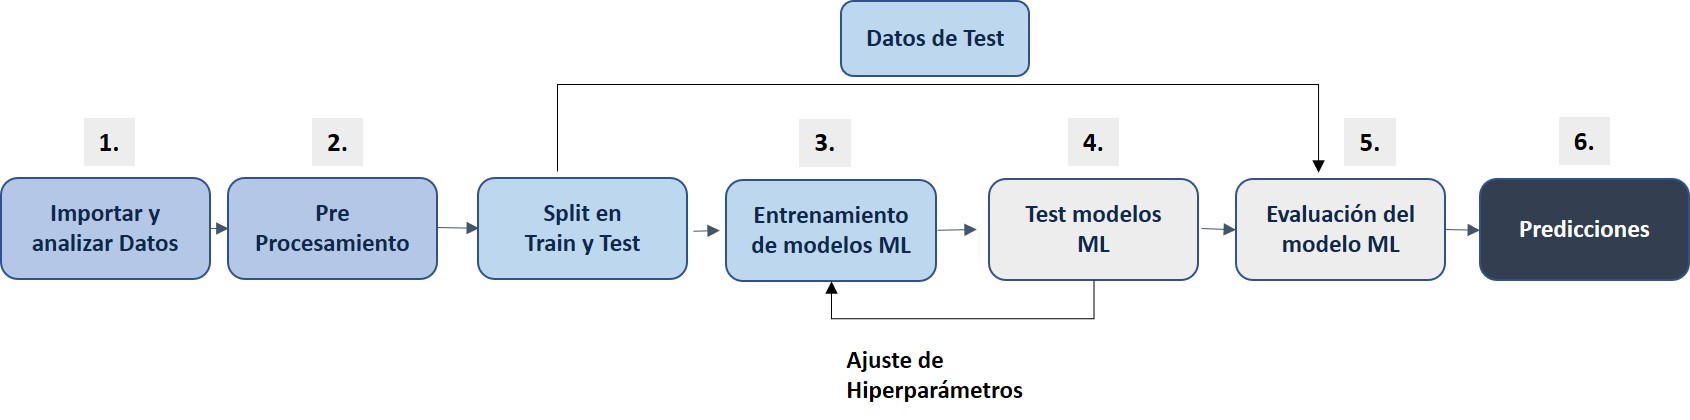

##### Objetivo: predecir si el pasajero del Titanic sobrevive o no
Tipo de entrenamiento: Modelo ML supervisado. Clasificación binaria

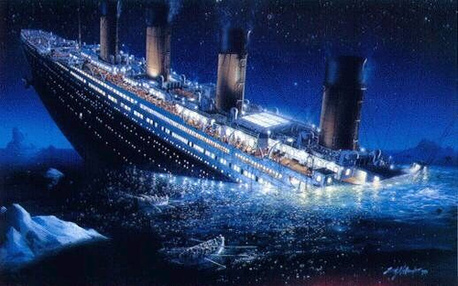

# Fase 1. Importing

In [1]:
!pip install findspark

In [3]:
cd

/home/vieroh


In [4]:
pwd

'/home/vieroh'

In [16]:
import findspark
findspark.init('/home/vieroh/apps/spark-3.3.0-bin-hadoop3-scala2.13')

In [17]:
import pandas as pd
import pyspark

In [18]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import OneHotEncoder

## Let's import the csv:

In [12]:
ls

'Tarea 2. Ejercicio_Machine Learning con Spark. Básico.ipynb'
'Tarea 4. Ejercicio_Machine Learning con Spark. Avanzado - copia.ipynb'
 train.csv


In [60]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext.getOrCreate()
spark = SparkSession(sc)

In [63]:
df = (spark.read
          .format("csv")
          .option('header', 'true')
          .load("train.csv"))

## Exploring

In [27]:
dp = df.toPandas()

In [28]:
dp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,None,S


In [30]:
cols_name = list(dp)
cols_name

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

## Dataset Shape and basic stats:

In [34]:
dp.shape

(891, 12)

In [35]:
df.dtypes

[('PassengerId', 'string'),
 ('Survived', 'string'),
 ('Pclass', 'string'),
 ('Name', 'string'),
 ('Sex', 'string'),
 ('Age', 'string'),
 ('SibSp', 'string'),
 ('Parch', 'string'),
 ('Ticket', 'string'),
 ('Fare', 'string'),
 ('Cabin', 'string'),
 ('Embarked', 'string')]

In [38]:
df.describe().toPandas()

,summary,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,count,891,891,891,891,891,714,891,891,891,891,204,889
1,mean,446.0,0.3838383838383838,2.308641975308642,None,None,29.69911764705882,0.5230078563411896,0.38159371492704824,260318.54916792738,32.2042079685746,None,None
2,stddev,257.3538420152301,0.48659245426485753,0.8360712409770491,None,None,14.526497332334035,1.1027434322934315,0.8060572211299488,471609.26868834975,49.69342859718089,None,None
3,min,1,0,1,"""Andersson, Mr. August Edvard (""""Wennerstrom"""")""",female,0.42,0,0,110152,0,A10,C
4,max,99,1,3,"van Melkebeke, Mr. Philemon",male,9,8,6,WE/P 5735,93.5,T,S


<AxesSubplot:>

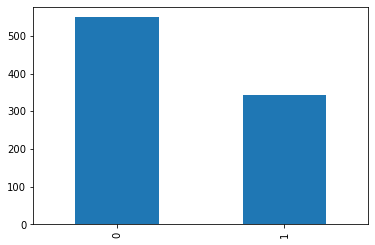

In [39]:
dp['Survived'].value_counts().plot(kind='bar')

<AxesSubplot:>

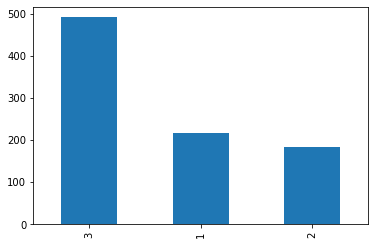

In [40]:
dp['Pclass'].value_counts().plot(kind='bar')

<AxesSubplot:>

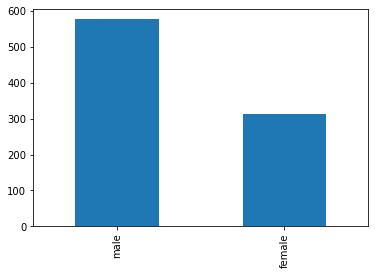

In [41]:
dp['Sex'].value_counts().plot(kind='bar')

# Fase 2. Pre-processing

### Dataset cleaning and type correction.

#### Tasks to do:
- Correct data types.
- OHE categories (Sex, 'Pclass')
- drop non-onboard people rows
- drop columns ('PassengerId','Name','Embarked')

In [94]:
df = (spark.read
          .format("csv")
          .option('header', 'true')
          .load("train.csv"))

In [71]:
dp = df.toPandas()
dp.shape

(891, 12)

In [54]:
cols_name

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [83]:
from pyspark.sql.functions import isnull, when, count, col
from pyspark.ml.feature import StringIndexer

In [95]:
#Sex OHE

dataset = StringIndexer(
    inputCol='Sex', 
    outputCol='SexNum', 
    handleInvalid='keep').fit(df).transform(df)

dataset = OneHotEncoder(
    inputCol='SexNum', 
    outputCol='SexIndex', 
    handleInvalid='keep').fit(dataset).transform(dataset)

In [96]:
#Class OHE
dataset = StringIndexer(
    inputCol='Pclass', 
    outputCol='PclassNum', 
    handleInvalid='keep').fit(dataset).transform(dataset)

dataset = OneHotEncoder(
    inputCol='PclassNum', 
    outputCol='PclassIndex', 
    handleInvalid='keep').fit(dataset).transform(dataset)

In [97]:
dataset.toPandas()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexNum,SexIndex,PclassNum,PclassIndex
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,None,S,0.0,"(1.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1.0,"(0.0, 1.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0)"
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,None,S,1.0,"(0.0, 1.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1.0,"(0.0, 1.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0)"
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,None,S,0.0,"(1.0, 0.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,None,S,0.0,"(1.0, 0.0, 0.0)",2.0,"(0.0, 0.0, 1.0, 0.0)"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S,1.0,"(0.0, 1.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0)"
888,889,0,3,"""Johnston, Miss. Catherine Helen """"Carrie""""""",female,None,1,2,W./C. 6607,23.45,None,S,1.0,"(0.0, 1.0, 0.0)",0.0,"(1.0, 0.0, 0.0, 0.0)"
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C,0.0,"(1.0, 0.0, 0.0)",1.0,"(0.0, 1.0, 0.0, 0.0)"


In [84]:
df1 = df.select(col('Pclass').cast('float'),
                         col('Age').cast('float'),
               col('Fare').cast('float'),
              col('Survived').cast('float') )

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexNum,SexIndex
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,None,S,0.0,"(1.0, 0.0, 0.0)"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1.0,"(0.0, 1.0, 0.0)"
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,None,S,1.0,"(0.0, 1.0, 0.0)"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1.0,"(0.0, 1.0, 0.0)"
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,None,S,0.0,"(1.0, 0.0, 0.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,None,S,0.0,"(1.0, 0.0, 0.0)"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S,1.0,"(0.0, 1.0, 0.0)"
888,889,0,3,"""Johnston, Miss. Catherine Helen """"Carrie""""""",female,None,1,2,W./C. 6607,23.45,None,S,1.0,"(0.0, 1.0, 0.0)"
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C,0.0,"(1.0, 0.0, 0.0)"


In [47]:
from pyspark.sql.functions import isnull, when, count, col
dataset.select([count(when(isnull(c), c)).alias(c) for c in dataset.columns]).show()

+--------+------+---+---+----+--------+
|Survived|Pclass|Sex|Age|Fare|Embarked|
+--------+------+---+---+----+--------+
|       0|     0|  0|177|   0|       2|
+--------+------+---+---+----+--------+



In [48]:
# Drop missing values
dataset = dataset.replace('null', None)\
        .dropna(how='any')

In [4]:
## transforma las variables categoricas en numericas


In [50]:
dataset.dtypes

[('Survived', 'float'),
 ('Pclass', 'float'),
 ('Sex', 'string'),
 ('Age', 'float'),
 ('Fare', 'float'),
 ('Embarked', 'string'),
 ('Gender', 'double'),
 ('Boarded', 'double')]

In [51]:
# Drop unnecessary columns
dataset = dataset.drop('Sex')
dataset = dataset.drop('Embarked')
dataset.show()

+--------+------+----+-------+------+-------+
|Survived|Pclass| Age|   Fare|Gender|Boarded|
+--------+------+----+-------+------+-------+
|     0.0|   3.0|22.0|   7.25|   0.0|    0.0|
|     1.0|   1.0|38.0|71.2833|   1.0|    1.0|
|     1.0|   3.0|26.0|  7.925|   1.0|    0.0|
|     1.0|   1.0|35.0|   53.1|   1.0|    0.0|
|     0.0|   3.0|35.0|   8.05|   0.0|    0.0|
|     0.0|   1.0|54.0|51.8625|   0.0|    0.0|
|     0.0|   3.0| 2.0| 21.075|   0.0|    0.0|
|     1.0|   3.0|27.0|11.1333|   1.0|    0.0|
|     1.0|   2.0|14.0|30.0708|   1.0|    1.0|
|     1.0|   3.0| 4.0|   16.7|   1.0|    0.0|
|     1.0|   1.0|58.0|  26.55|   1.0|    0.0|
|     0.0|   3.0|20.0|   8.05|   0.0|    0.0|
|     0.0|   3.0|39.0| 31.275|   0.0|    0.0|
|     0.0|   3.0|14.0| 7.8542|   1.0|    0.0|
|     1.0|   2.0|55.0|   16.0|   1.0|    0.0|
|     0.0|   3.0| 2.0| 29.125|   0.0|    2.0|
|     0.0|   3.0|31.0|   18.0|   1.0|    0.0|
|     0.0|   2.0|35.0|   26.0|   0.0|    0.0|
|     1.0|   2.0|34.0|   13.0|   0

In [52]:
# Assemble all the features with VectorAssembler
required_features = ['Pclass',
                    'Age',
                    'Fare',
                    'Gender',
                    'Boarded'
                   ]
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=required_features, outputCol='features')
transformed_data = assembler.transform(dataset)

In [53]:
transformed_data.show()

+--------+------+----+-------+------+-------+--------------------+
|Survived|Pclass| Age|   Fare|Gender|Boarded|            features|
+--------+------+----+-------+------+-------+--------------------+
|     0.0|   3.0|22.0|   7.25|   0.0|    0.0|[3.0,22.0,7.25,0....|
|     1.0|   1.0|38.0|71.2833|   1.0|    1.0|[1.0,38.0,71.2833...|
|     1.0|   3.0|26.0|  7.925|   1.0|    0.0|[3.0,26.0,7.92500...|
|     1.0|   1.0|35.0|   53.1|   1.0|    0.0|[1.0,35.0,53.0999...|
|     0.0|   3.0|35.0|   8.05|   0.0|    0.0|[3.0,35.0,8.05000...|
|     0.0|   1.0|54.0|51.8625|   0.0|    0.0|[1.0,54.0,51.8624...|
|     0.0|   3.0| 2.0| 21.075|   0.0|    0.0|[3.0,2.0,21.07500...|
|     1.0|   3.0|27.0|11.1333|   1.0|    0.0|[3.0,27.0,11.1332...|
|     1.0|   2.0|14.0|30.0708|   1.0|    1.0|[2.0,14.0,30.0708...|
|     1.0|   3.0| 4.0|   16.7|   1.0|    0.0|[3.0,4.0,16.70000...|
|     1.0|   1.0|58.0|  26.55|   1.0|    0.0|[1.0,58.0,26.5499...|
|     0.0|   3.0|20.0|   8.05|   0.0|    0.0|[3.0,20.0,8.05000

In [54]:
transformed_data.head()

Row(Survived=0.0, Pclass=3.0, Age=22.0, Fare=7.25, Gender=0.0, Boarded=0.0, features=DenseVector([3.0, 22.0, 7.25, 0.0, 0.0]))

#### Fase 3. Entrenamiento del modelo


In [55]:
(training_data, test_data) = transformed_data.randomSplit([0.8,0.2])

In [6]:
## genera un modelo de regresion logistica básico para predecir 'Survived'

In [7]:
## entrena el modelo con train

In [8]:
## realiza una prediccion sobre los datos de test

#### Fase 4. Evaluación del modelo

In [9]:

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

## genera un evaluator para el accuracy

ModuleNotFoundError: No module named 'pyspark'

In [10]:
## imprime el accuracy del modelo. Razon si a priori parece un buen modelo o no